In deze notebook vertrekken we van de grafiek $\Sigma $ horende bij de functie met voorschrift 
$$ \Sigma \leftrightarrow z = f(x,y)= x y e^{x} $$
We wensen te visualiseren dat de partiële afgeleide$$ \left( \frac{ \partial{f} }{\partial{x}} \right)_0
 $$in een concreet punt $P_0(x_0,y_0)$, ons de richtingscoëfficiënt zal geven van de raaklijn $r$ aan de ruimtekromme $K$ die ontstaat als snijlijn van  $ \Sigma$  en het verticale vlak $\alpha \leftrightarrow y = y_0$   <br>
We kiezen $x_0 = 1 $ en $y_0=2$ en starten met het opstellen van het functievoorschrift. 

In [11]:
from sympy import exp, symbols,diff
x_s, y_s, z_s = symbols('x y z')
z_s = x_s*y_s*exp(x_s)
z_s

x*y*exp(x)

Vervolgens berekenen we de partële afgeleide $ \frac{ \partial{f} }{\partial{x}}  $:

In [12]:
afg_x= diff(z_s,x_s)
afg_x

x*y*exp(x) + y*exp(x)

Om tot de richtingscoëfficiënt van de raaklijn in het vlak $y=2$ in het punt (1,2) te komen, vullen we in de bekomen uitdrukking de waarden (1,2) in: 

In [13]:
afg_x.subs({x_s:1,y_s:2})

4*E

De vergelijking van de <b>raaklijn</b> in een verticaal vlak evenwijdig met het  $XZ-$vlak is 
$$ z-z_0 = \left(  \frac{ \partial{z} }{\partial{x}}  \right)_0   (x- x_0) $$

Voor het plotten van de raaklijn, is een parametervoorstelling nodig. Daarvoor berekenen we 

$$ z =\left(  \frac{ \partial{z} }{\partial{x}}  \right)_0     (x- x_0) +z_0$$

Een parametervergelijking voor de raaklijn in $(1,2)$is dan, <br>
met $z = f(1,2) =   1 \cdot 2 e^1 = 2 \cdot e $:
\begin{align*}
x_r &= t_r \\
y_r &= 2 \\
z_r &= 4e(t_r - 1) + 2e
\end{align*}

We zijn eveneens op zoek naar de  parametervoorstelling
$$x_k  = x(t)$$
$$y_k  = y(t)$$
$$z_k  = z(t)$$

van de <b>ruimtekromme</b> $K$ die ontstaat als snijlijn van het gekromde oppervlak $\Sigma$ met voorschrift 
$$z = f(x,y)= x y e^{x} $$
specifiek voor snijvlak met verticaal vlak $\alpha \leftrightarrow y = 2$, is alvast 
$$y = 2$$
de hoogte van de punten in dat verticale vlak kunnen we berekenen met $y=2$ als:
$$z = x 2 e^{x} $$


Tijd voor de visualisatie van dit alles. 

In [14]:
%matplotlib notebook

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D

lichtblauw = "#EEF4F7"
standaardblauw = "tab:blue"

<IPython.core.display.Javascript object>


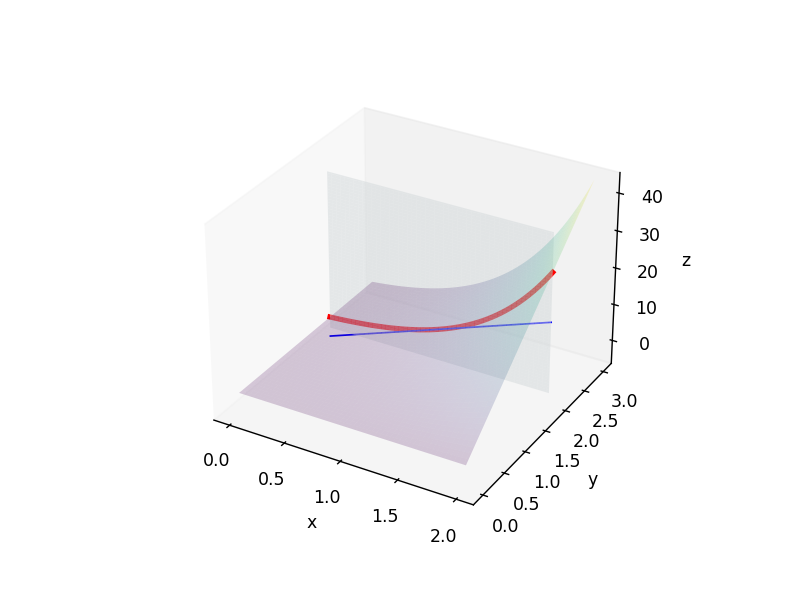

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


opdeling = 100
x  = np.linspace(0,2,opdeling)
y  = np.linspace(0,3,opdeling)
z  = np.linspace(-3,40,opdeling)

X,Y = np.meshgrid(x ,y)
f = lambda x, y: x*y*np.exp(x)
Z = f(X, Y)


#we maken een extra raster aan met waarden in het X, en Z-vlak, als voorbereiding op het plotten van het vlak alpha
X_vlak1, Z_vlak1 = np.meshgrid(x , z )

#opstellen van parametervergelijking van ruimtekromme K 
#we gebruiken de reeds bestaande opdeling van x  het interval voor de parameter t
t = x 

x_k = t
y_k= np.full(opdeling, 2)  #handig commando van numpy om een array aan te maken met lengte 'opdeling' en 'vol met' de waarden '2'
z_k = 2*t*np.exp(t)

#opstellen van parametervergelijking van raaklijn door het punt (1,2)
x_r = t
y_r = y_k
z_r = 4*np.e*(t-1)+2*np.e

#plot van het vlak simga
ax.plot_surface(X, Y, Z,cmap='viridis',alpha=0.2)

#plot van ruimtekromme K
ax.plot(x_k, y_k, z_k, color='red', lw= 3)
#plot van raaklijn r aan ruimtekromme K in (1,2):
ax.plot(x_r, y_r, z_r, color='blue', lw= 1)
    
#plot van vlak y = 2
ax.plot_surface(X_vlak1,  2 , Z_vlak1, alpha=0.5, color=lichtblauw)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax.grid(False)
plt.show()